# Task 1A: Build a Fully Connected 2 - Layer Neural Network to Classify Digits

This notebook will serve as implementation of the API that you have created in your "Code" folder. You will write functions in the "py" files and use them here.

We will be using inbuilt MNIST dataset present in PyTorch and train a neural network to classify digits. 

## What is expected from this notebook?

This notebook should be used to present your work. You should explain wherever necessary (but also not too much) about what you did and why you did it. You should explain things like hyper parameter settings (even if it was provided before hand to you by us), training performance and testing performance of the model. You should reason why your model is working fine and not overfitting.

Since numbers don't are an argot, you should also use visualizations wherever possible. You can visualize things like loss curve, show confusion matrix, etc. 

Finally, you can show some manual verifications by displaying and making predictions on random test examples. 

**NOTE: The amount of things you can do in this notebook is limitless (hyperbole). But don't do too much at the cost of rest of your tasks. Remember to maintain the outputs while submitting this notebook.**

## Absolutely required items?

1. First of all, import the libraries and the dataset.
2. Next, show dataset samples and distribution of different type of data. For example, in case of MNIST you can show some random images and their labels. Also, show distribution of each class of images.
3. Next, perform required transformations on MNIST dataset (normalization, scaling, grayscaling if required, etc) using torchvision transforms.
4. Create required dataloaders on PyTorch MNIST dataset to load data in mini-batches.
5. Train the model, show loss and accuracy at each step of operation.
6. Plot the **loss curve for both train and validation phase**
7. Pick some manual random images from test dataset and predict their values **showing expected and actual result**.

**NOTE: You may or may not delete these instruction cells after completion of the notebook.**

# Your solution

In [7]:
# Homecoming (eYRC-2018): Task 1A
# Build a Fully Connected 2-Layer Neural Network to Classify Digits

from nnet import model
from nnet import activation, loss, model, optimizer
import sys
import os
import math
import copy
import matplotlib.pyplot as plt

# Import torch and torchvision libraries
# We will use torchvision's transforms and datasets

import torch
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms


In [8]:
#FUNCTION TO SHOW IMAGE
import numpy as np
# NUMPY IS IMPORTED "ONLY TO DISPLAY SAMPLE IMAGES". IT IS NOT USED FOR MATHEMATICAL OPERATIONS IN THE .PY FILES
def imshow(image):
    image = image / 2 + 0.5 
    npimage = image.numpy()
    plt.imshow(np.transpose(npimage, (1, 2, 0)))
    
#DEFINING CLASSES OF TRAINING SET
classes=('0','1','2','3','4','5','6','7','8','9')


In [9]:
# Defining torchvision transforms for preprocessing
# Using torchvision datasets to load MNIST
# Using torch.utils.data.DataLoader to create loaders for train and test
# training batch size = 4 in train data loader.

trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
# Here the parameters to Normalize are mean=0.5 and standard deviation=1
train_set = dset.MNIST(root='./data', train=True, transform=trans, download=True)
test_set = dset.MNIST(root='./data', train=False, transform=trans, download=True)

batch_size=4
# Creating dataloaders
train_loader = torch.utils.data.DataLoader(dataset=train_set,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set,batch_size=batch_size,shuffle=False)


SAMPLE 4 LABELS =
['1', '6', '8', '8']


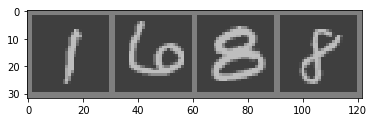

In [10]:
#ITERATING TO TRAINING SET AND SELECTING SOME RANDOM IMAGES AS MINI BATCH AND PLOTTING THOSE IMAGES
traindata=iter(train_loader)
images,labels=traindata.next()
print("SAMPLE",batch_size,"LABELS =")
print(u"{}".format([classes[labels[j]] for j in range(batch_size)]))
imshow(torchvision.utils.make_grid(images))

TRAINING STARTED
loss:  1.9951363801956177
accuracy:  0.5
loss:  1.34600830078125
accuracy:  0.5
loss:  0.6154571771621704
accuracy:  1.0
loss:  0.690331220626831
accuracy:  0.75
loss:  0.24267719686031342
accuracy:  1.0
loss:  0.17662155628204346
accuracy:  1.0
loss:  0.12684671580791473
accuracy:  1.0
TRAINING FINISHED


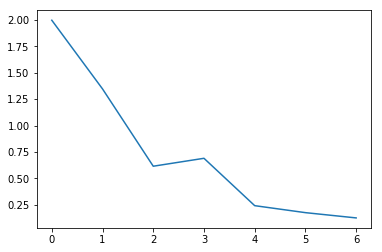

In [11]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

# Layer size
N_in = 28 * 28 # Input size
N_h1 = 256 # Hidden Layer 1 size
N_h2 = 256 # Hidden Layer 2 size
N_out = 10 # Output size
# Learning rate
lr = 0.001

# init model
net = model.FullyConnected(N_in, N_h1, N_h2, N_out, device=device)

# number of epochs
N_epoch = 7 

losses=[]
print("TRAINING STARTED")
for epoch in range(N_epoch):
    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs=inputs.view(-1,N_in)   
        net.train(inputs,labels,lr)
    k, s, creloss, accuracy, outputs=net.eval(inputs, labels, debug=True)
    losses.append(creloss)
print("TRAINING FINISHED")
plt.plot(losses)
plt.savefig("losses.png", trasparent = True)

PREDICTING FOR TEST INPUTS
Accuracy for the given test case: 89.03 %


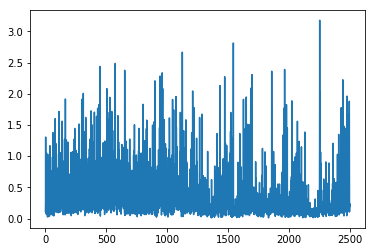

In [12]:
S=0 # total number of test cases 
K=0 # number of test cases correctly predicted 
print("PREDICTING FOR TEST INPUTS")
test_losses=[]
class_count={'0':0,'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0,'9':0}
total_count={'0':0,'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0,'9':0}
for batch_idx, (inputs, labels) in enumerate(test_loader):
    inputs = inputs.view(-1, N_in)
    score, idx = net.predict(inputs)
    for j in range(idx.size(0)):
        total_count[str(int(labels[j]))]+=1
        if(idx[j]==labels[j]):
            class_count[str(int(labels[j]))]+=1
    #print("Score : ", score)
    #print("Index : ", idx,"Labels : ",labels)
    k, s, creloss, accuracy, outputs=net.eval(inputs, labels)
    test_losses.append(creloss)
    # update after each batch
    S+=s 
    K+=k
print("Accuracy for the given test case:", 100*K/S,"%")
plt.plot(test_losses)
plt.savefig("test_losses.png", transparent = True)

In [13]:
print(class_count)
print(total_count)

{'0': 956, '1': 1103, '2': 861, '3': 879, '4': 903, '5': 737, '6': 878, '7': 908, '8': 807, '9': 871}
{'0': 980, '1': 1135, '2': 1032, '3': 1010, '4': 982, '5': 892, '6': 958, '7': 1028, '8': 974, '9': 1009}


In [14]:
for i in range(N_out):
    print("Accuracy for", str(i),"=",class_count[str(i)]/total_count[str(i)]*100,"%")

Accuracy for 0 = 97.55102040816327 %
Accuracy for 1 = 97.18061674008811 %
Accuracy for 2 = 83.43023255813954 %
Accuracy for 3 = 87.02970297029702 %
Accuracy for 4 = 91.95519348268839 %
Accuracy for 5 = 82.62331838565022 %
Accuracy for 6 = 91.64926931106471 %
Accuracy for 7 = 88.32684824902724 %
Accuracy for 8 = 82.85420944558521 %
Accuracy for 9 = 86.32309217046581 %


In [31]:
from io import open
import os
from PIL import Image
import PIL.ImageOps
#FUNCTION TO PREDICT IMAGE
def predict_image(image_path):
    print("PREDICTION OF CUSTOM IMAGE IS IN PROGRESS")
    """net=Net()
    #LOAD MODEL
    net.load_state_dict(torch.load("HC#3266_stage1.model"))"""
    #RESIZE CUSTOM IMAGE TO 100 INTO 100 PIXELS IMAGE
    desired_size=28
    im1 = Image.open(image_path)
    im = PIL.ImageOps.invert(im1)
    im.save('new.jpg')
    old_size = im.size
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    im = im.resize(new_size, Image.ANTIALIAS)
    new_im = Image.new("L", (desired_size, desired_size))
    new_im.paste(im, ((desired_size-new_size[0])//2 , (desired_size-new_size[1])//2) )
    new_im.show()
    transformation = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (1.0,))])
    image_tensor = transformation(new_im).float()
    """if torch.cuda.is_available():
        image_tensor.cuda()"""
    image_tensor_input=image_tensor.view(-1,N_in)
    print(image_tensor_input.size())
    
    
    
    imshow(torchvision.utils.make_grid(image_tensor))
    score,idx=net.predict(image_tensor_input)
    print("prediction:  ",idx.item())
   

PREDICTION OF CUSTOM IMAGE IS IN PROGRESS
torch.Size([1, 784])
prediction:   6


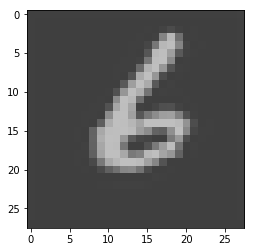

In [32]:
imagefile = "images.jpg"
#CUSTOM IMAGE PATH
imagepath = os.path.join(os.getcwd(), imagefile)
predict_image(imagepath)

PREDICTION OF CUSTOM IMAGE IS IN PROGRESS
torch.Size([1, 784])
prediction:   3


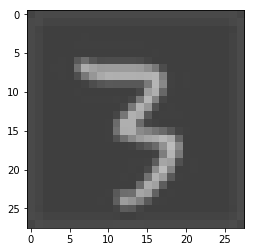

In [33]:
imagefile2 = "download.jpg"
#CUSTOM IMAGE PATH
imagepath2 = os.path.join(os.getcwd(), imagefile2)
predict_image(imagepath2)

PREDICTION OF CUSTOM IMAGE IS IN PROGRESS
torch.Size([1, 784])
prediction:   7


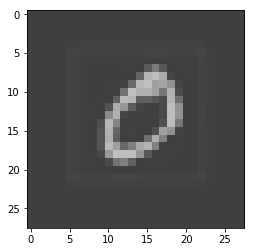

In [34]:
imagefile3 = "download1.jpg"
#CUSTOM IMAGE PATH
imagepath3 = os.path.join(os.getcwd(), imagefile3)
predict_image(imagepath3)

PREDICTION OF CUSTOM IMAGE IS IN PROGRESS
torch.Size([1, 784])
prediction:   4


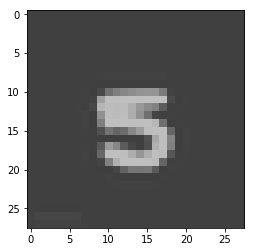

In [35]:
imagefile4= "5.jpg"
#CUSTOM IMAGE PATH
imagepath4 = os.path.join(os.getcwd(), imagefile4)
predict_image(imagepath4)

PREDICTION OF CUSTOM IMAGE IS IN PROGRESS
torch.Size([1, 784])
prediction:   9


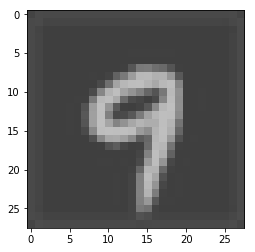

In [40]:
imagefile5 = "9.jpg"
#CUSTOM IMAGE PATH
imagepath5 = os.path.join(os.getcwd(), imagefile5)
predict_image(imagepath5)